In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pylab as plt

In [2]:
print(5)

5


In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Feature Engineering/weight-height.csv")

In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


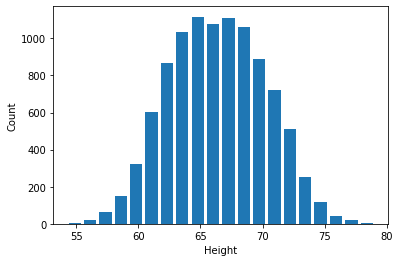

In [7]:
plt.hist(data.Height, bins=20, rwidth=0.8)
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()

In [8]:
data.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

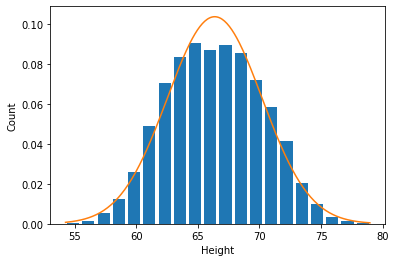

In [9]:
from scipy.stats import norm
import numpy as np
plt.hist(data.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel("Height")
plt.ylabel("Count")
rang = np.arange(data.Height.min(), data.Height.max(), 0.1)
plt.plot(rang, norm.pdf(rang, data.Height.mean(), data.Height.std()))

In [13]:
upper_limit = data.Height.mean() + 3 * data.Height.std()
lower_limit = data.Height - 3 * data.Height.std()

git The Upper and lower data point from datra set

In [14]:
data[(data.Height > upper_limit) | (data.Height < lower_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783


In [15]:
lower_limit

0       62.304433
1       57.239320
2       62.567521
3       60.188394
4       58.339211
          ...    
9995    54.630068
9996    55.524570
9997    52.325408
9998    57.491659
9999    50.401662
Name: Height, Length: 10000, dtype: float64

In [19]:
data_dev = data[(data.Height < upper_limit) & (data.Height > lower_limit)]

In [20]:
data_dev.shape

(9995, 3)

In [29]:
data_dev.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [22]:
data.shape[0] - data_dev.shape[0]

5

**Z score**

In [23]:
data["zscore"] = (data.Height - data.Height.mean())/data.Height.std()

In [24]:
data.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [26]:
data[data["zscore"] > 3]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [27]:
data[data["zscore"] < -3]

,Gender,Height,Weight,zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [28]:
data[(data.zscore < -3) | (data.zscore > 3 ) ]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027
